In [112]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import joblib
import ast

import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df_origin = pd.read_csv("Generate Dataset/dataset/chongluadaov2.csv")
df_train = pd.read_csv("Generate Dataset/dataset/chongluadao_dataset.csv")

In [59]:
inner = pd.merge(left=df_origin, right=df_train, left_on='url', right_on='urls',how='left')
del inner['urls']

In [60]:
inner.dropna()

,url,labels,type,features
0,https://oriamna.weebly.com,1,train,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,https://support.office.com/?legRedir=true&amp;...,0,train,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
2,https://www.pinterest.com/48CATI/disfraces/,0,train,"[0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
3,https://www.group-whatsapp.vloz4.com,1,test,"[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]"
4,http://www.chimiciveneto.it/nuovosito/images/f...,1,train,"[0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
...,...,...,...,...
37567,https://unauthorised-payee-securetsb-connect.com,1,train,"[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]"
37568,http://shabbydiy.com/wp-includes/ID3/bankofame...,1,train,"[0, 0, 4, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]"
37569,https://http://https://www.wikipedia.org/?http...,0,train,"[0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]"
37572,http://d660441.u-telcom.net/DROPBOXFILE/,1,train,"[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]"


In [78]:
data_train = inner[inner['type'].str.contains("train")].dropna()
data_test  = inner[inner['type'].str.contains("test")].dropna()

In [123]:
data_train

,url,labels,type,features
0,https://oriamna.weebly.com,1,train,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,https://support.office.com/?legRedir=true&amp;...,0,train,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
2,https://www.pinterest.com/48CATI/disfraces/,0,train,"[0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
4,http://www.chimiciveneto.it/nuovosito/images/f...,1,train,"[0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
5,http://jezebel.com/goodbye-revenge-ill-miss-ou...,0,train,"[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]"
...,...,...,...,...
37562,https://http://https://www.ringcentral.com/htt...,0,train,"[0, 0, 13, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]"
37567,https://unauthorised-payee-securetsb-connect.com,1,train,"[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]"
37568,http://shabbydiy.com/wp-includes/ID3/bankofame...,1,train,"[0, 0, 4, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]"
37569,https://http://https://www.wikipedia.org/?http...,0,train,"[0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]"


In [79]:
x = data_train['features'].values
y = data_train['labels'].values

# x = [np.array(i) for i in x]
x = [ast.literal_eval(i) for i in x]

In [125]:
len(x[0])

15

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )

#----------------applying grid search to find best performing parameters 
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [100, 700]}])

In [90]:
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 
#-------------------------------------------------------------------------

#fitting RandomForest regression with best params 
classifier = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_features = 'log2',  random_state = 0)
classifier.fit(x_train, y_train)

#predicting the tests set result
y_pred = classifier.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#pickle file joblib
joblib.dump(classifier, 'rf_final.pkl')

Best Accurancy =0.8212199575501573
best parameters ={'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}
[[2581  567]
 [ 709 3335]]


['rf_final.pkl']

In [126]:
Features = ['Have_IP', 'Have_At', 'URL_Depth','Redirection', 
            'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 
            'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards','Punny_Code']

In [131]:
names = np.array(Features)
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])

Text(0, 0.5, 'FEATURE NAMES')

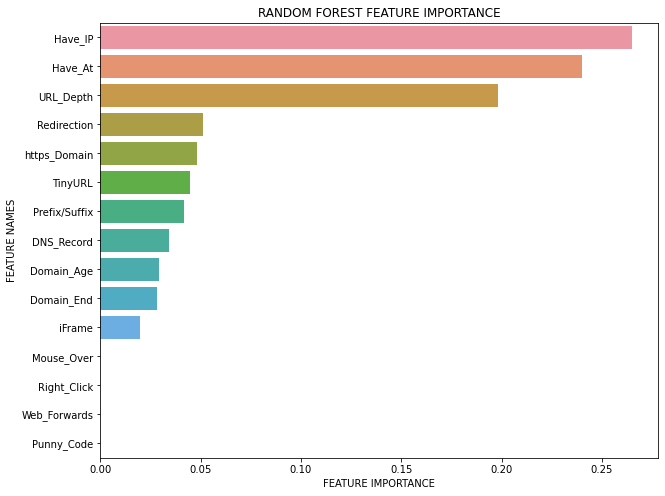

In [132]:
fi_df = var_imp

fi_df.sort_values(by=['importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['importance'], y=names)
#Add chart labels
plt.title('RANDOM FOREST FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

# Testing

In [140]:
from feature_extraction import *

classifier = joblib.load('rf_final.pkl')

ext = Extractor()
url = "https://github.com/numpy/numpy/issues/5303"

Vector = np.array(ext(url)).reshape(1, -1)

prediction = classifier.predict(Vector )
print(prediction)

[0, 0, 4, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[0]


In [142]:
import json

with open('Generate Dataset/dataset/blacklist','r') as f:
    black = json.load(f)

In [144]:
black[0]

{'_id': '604bb52f6a1161c2e7d8608c',
 'url': 'http://2021-lmht.gq/*',
 'type': 'scam',
 'level': 'high',
 'meta': {}}

In [ ]:
for i in black:
    Vector = np.array(ext(i['url'])).reshape(1, -1)
    
    prediction = classifier.predict(Vector )
    print(prediction)

Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[0]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[0]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0

[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
Domain Age:  1826
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
Domain Age:  366
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[0]
Domain Age:  5843
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1,

[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
Domain Age:  731
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  731
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
Domain Age:  365
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
Domain Age:  1096
[0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]
[0]
Domain Age:  1096
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[1]
Error trying to connect to socket: closing socket
[0, 0, 1, 0, 1, 0, 0, 0, 1, 1